In [ ]:
!pip install ucimlrepo

# Data Loading and Analysis

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
X.shape

(6497, 11)

In [ ]:
y.shape

(6497, 1)

In [ ]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
print("Duplicates in X:", X.duplicated().sum())
print("Duplicates in y:", y.duplicated().sum())

Duplicates in X: 1179
Duplicates in y: 6490


# Preprocessing

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Concatenated x and y into variable data
data = pd.concat([X, y], axis=1)

print("Before removing duplicates:", data.shape)
#Dropped the duplicates
data = data.drop_duplicates()

print("After removing duplicates:", data.shape)

print("\nCleaned Data:")
print(data.head())

X_clean = data.drop('quality', axis=1)
y_clean = data['quality']

Before removing duplicates: (6497, 12)
After removing duplicates: (5318, 12)

Cleaned Data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.5

In [ ]:
print(X.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [ ]:
X_clean.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [ ]:
y_clean.head()

,quality
0,5
1,5
2,5
3,6
5,5


In [ ]:
# Grouped the values as low, medium, high
def map_quality(q):
    if q <= 4:
        return 'Low'
    elif q <= 6:
        return 'Medium'
    else:
        return 'High'

y_grouped = y_clean.apply(map_quality)

print(y_grouped.value_counts())

quality
Medium    4074
High      1008
Low        236
Name: count, dtype: int64


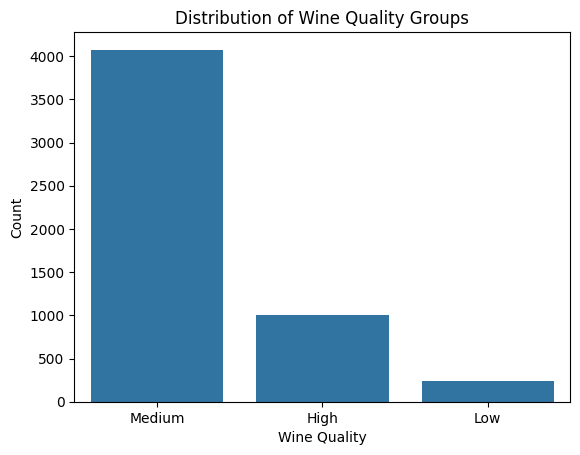

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_grouped)
plt.title("Distribution of Wine Quality Groups")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

# Splitting of data

In [ ]:
from sklearn.model_selection import train_test_split
# Splitted the data into train,validation and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_clean, y_grouped, test_size=0.3, random_state=42, stratify=y_grouped)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (3722, 11)
Validation size: (798, 11)
Test size: (798, 11)


# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaled the features using Standard scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
#training the model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Evaluation of logreg
y_test_pred = logreg.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_acc)
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.7844611528822055
Confusion Matrix (Test Set):
[[ 55   0  96]
 [  1   1  34]
 [ 40   1 570]]

Classification Report (Test Set):
              precision    recall  f1-score   support

        High       0.57      0.36      0.45       151
         Low       0.50      0.03      0.05        36
      Medium       0.81      0.93      0.87       611

    accuracy                           0.78       798
   macro avg       0.63      0.44      0.46       798
weighted avg       0.75      0.78      0.75       798



# Handling Class Imbalance and Model Training




In [ ]:
#handling the class imbalance using balanced
logreg_balanced = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

logreg_balanced.fit(X_train_scaled, y_train)
y_test_pred_bal = logreg_balanced.predict(X_test_scaled)
print("Balanced Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred_bal))
print(confusion_matrix(y_test, y_test_pred_bal))
print(classification_report(y_test, y_test_pred_bal))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Balanced Logistic Regression Test Accuracy: 0.5200501253132832
[[122   6  23]
 [  5  23   8]
 [182 159 270]]
              precision    recall  f1-score   support

        High       0.39      0.81      0.53       151
         Low       0.12      0.64      0.21        36
      Medium       0.90      0.44      0.59       611

    accuracy                           0.52       798
   macro avg       0.47      0.63      0.44       798
weighted avg       0.77      0.52      0.56       798



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#Finding the best parameters using GridSearchCV and training the final model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'class_weight': [None]
}

grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train_res, y_train_res)

best_logreg = grid.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Model Evaluation

In [ ]:
y_test_pred = best_logreg.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Final model Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.5175438596491229
Confusion Matrix:
 [[122   8  21]
 [  6  24   6]
 [182 162 267]]
              precision    recall  f1-score   support

        High       0.39      0.81      0.53       151
         Low       0.12      0.67      0.21        36
      Medium       0.91      0.44      0.59       611

    accuracy                           0.52       798
   macro avg       0.48      0.64      0.44       798
weighted avg       0.78      0.52      0.56       798



# Interpretation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Finding the most influenticial features
coefs = best_logreg.coef_

feature_importance = np.mean(np.abs(coefs), axis=0)

feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
7                density    0.588248
10               alcohol    0.534773
1       volatile_acidity    0.495547
3         residual_sugar    0.470228
0          fixed_acidity    0.364792
5    free_sulfur_dioxide    0.298534
8                     pH    0.288370
9              sulphates    0.285157
6   total_sulfur_dioxide    0.283801
4              chlorides    0.060604
2            citric_acid    0.047492


# Visualization

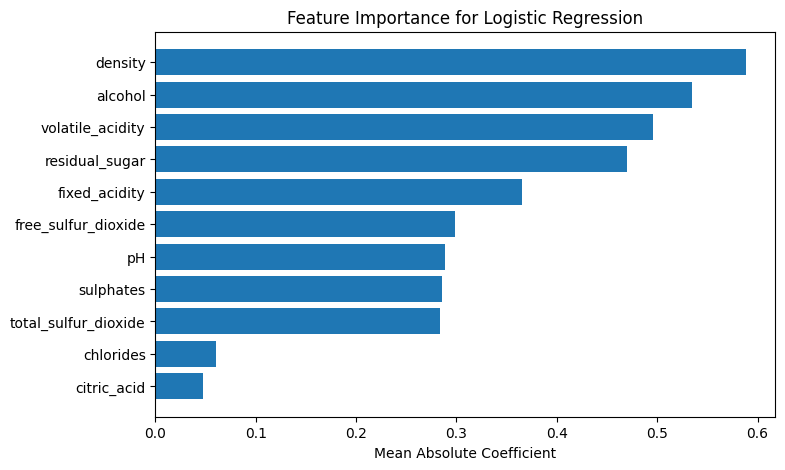

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Mean Absolute Coefficient')
plt.title('Feature Importance for Logistic Regression')
plt.show()